In [201]:
# importing libraries.
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import random 
import string
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Campaign related tables
campaign_desc = pd.read_csv(r"C:\Users\HP\Downloads\G6 - Confidential\campaign_desc.csv")
campaign_table = pd.read_csv(r"C:\Users\HP\Downloads\G6 - Confidential\campaign_table.csv")

# Coupon related tables
coupon = pd.read_csv(r"C:\Users\HP\Downloads\G6 - Confidential\coupon.csv")
coupon_redempt = pd.read_csv(r"C:\Users\HP\Downloads\G6 - Confidential\coupon_redempt.csv")

# Product related tables
casual_data = pd.read_csv(r"C:\Users\HP\Downloads\G6 - Confidential\causal_data.csv")
product = pd.read_csv(r"C:\Users\HP\Downloads\G6 - Confidential\product.csv")

# Customer/ Transaction related tables
hh_demographic = pd.read_csv(r"C:\Users\HP\Downloads\G6 - Confidential\hh_demographic.csv")
transaction_data = pd.read_csv(r"C:\Users\HP\Downloads\G6 - Confidential\transaction_data.csv")

In [206]:
t=['campaign_desc','campaign_table','causal_data','coupon','coupon_redempt','hh_demographic','product','transaction_data']
l=[]
x=[]
# Extracted_tables_info => tables generated throughout the file and there describtion.

# Coupon redemption classification model
**PROBLEM STATEMENT**
* Model building for the coupon redemption problem can completely depend on the demographic information of the households
* hh_demographic table contains the demographic information of the households => 801.
* So the whole analysis will be done for the 801 household.
* Aim is to build a model to read the pattern of the households which defines the redemption criteria of the coupons
depending on the demographic information of the households.

**DESCRIPTION**

We know from the dataset that 70% of the customers never use the coupons they receive and this would lead to a waste of money and time for the company.
My objective here is to create a classification model to predict if a customer will redeem its coupons or not for the last 3 campaigns of the year. Beyond knowing which customers will redeem their coupons, it can be more interesting for a company to identify which customers won't redeem them in order to either decide on different marketing and communication actions for reaching them or to not send them coupon at all and save money.

In [207]:
print('total no. of households :'.title(),transaction_data.household_key.nunique())
print('no. of households to which coupons were provided :'.title(),campaign_table.household_key.nunique())
print('no. of households who redmeed coupons :'.title(),coupon_redempt.household_key.nunique())
print('pct of households where coupons got wasted :'.title(),
      round((campaign_table.household_key.nunique()-coupon_redempt.household_key.nunique())/campaign_table.household_key.nunique()*100,2),'%')

Total No. Of Households : 2500
No. Of Households To Which Coupons Were Provided : 1584
No. Of Households Who Redmeed Coupons : 434
Pct Of Households Where Coupons Got Wasted : 72.6 %


In [208]:
# creating target variable.
hh_demographic['Target']=hh_demographic.household_key.apply(lambda x: 1 if x in coupon_redempt.household_key.unique() else 0)
hh_demographic.Target.value_counts()

0    490
1    311
Name: Target, dtype: int64

In [209]:
hh_demographic

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Target
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,0
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8,1
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13,1
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16,0
...,...,...,...,...,...,...,...,...,...
796,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2494,1
797,45-54,A,75-99K,Homeowner,Unknown,3,1,2496,1
798,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,2497,0
799,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2498,0


## 1) Campaign Data => Campaign_desc table

* This table contains the basic and essential information of each campaign thier type and Start and End day.

In [210]:
campaign_desc.sort_values(['START_DAY','CAMPAIGN'])

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
29,TypeA,26,224,264
28,TypeC,27,237,300
27,TypeB,28,259,320
26,TypeB,29,281,334
25,TypeA,30,323,369
23,TypeB,1,346,383
24,TypeB,2,351,383
20,TypeC,3,356,412
22,TypeB,4,372,404
21,TypeB,5,377,411


* There are 3 types of campaign type.
* Total 30 campaign took place in 2 years of time span

In [211]:
# Mean duration of all of the campaign that took place...
campaign_desc['DURATION']=campaign_desc['END_DAY']-campaign_desc['START_DAY']
(campaign_desc['DURATION']).mean()

46.6

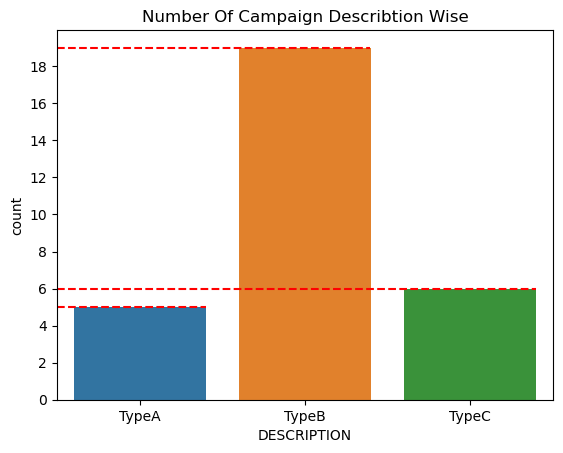

In [212]:
## INSIGHT
# number of campaign Describtion wise.. plot
sns.countplot(campaign_desc.DESCRIPTION.sort_values())
plt.yticks(np.arange(0,20,2))
plt.title('number of campaign Describtion wise'.title())
plt.axhline(y=19,xmax=0.63,ls='--',color='red')
plt.axhline(y=6,xmax=0.965,ls='--',color='red')
plt.axhline(y=5,xmax=0.3,ls='--',color='red')
plt.show()

* Maximum no. of campaigns are of Type-B i.e. 19.

In [213]:
campaign_desc.sort_values(['START_DAY','CAMPAIGN'])

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,DURATION
29,TypeA,26,224,264,40
28,TypeC,27,237,300,63
27,TypeB,28,259,320,61
26,TypeB,29,281,334,53
25,TypeA,30,323,369,46
23,TypeB,1,346,383,37
24,TypeB,2,351,383,32
20,TypeC,3,356,412,56
22,TypeB,4,372,404,32
21,TypeB,5,377,411,34


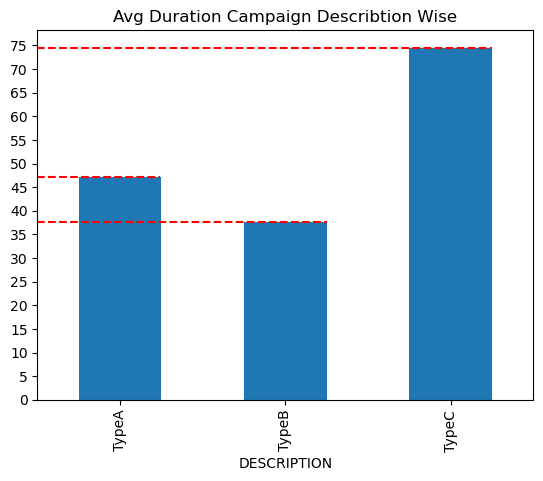

In [214]:
## INSIGHT
# Avg duration campaign describtion wise.. plot.
campaign_desc.groupby('DESCRIPTION')['DURATION'].mean().plot(kind='bar')
plt.yticks(np.arange(0,80,5))
plt.axhline(y=47.2,ls='--',color='red',xmax=0.247)
plt.axhline(y=37.631579,ls='--',color='red',xmax=0.584)
plt.axhline(y=74.5,ls='--',color='red',xmax=0.916)
plt.title('Avg duration campaign describtion wise'.title())
plt.show()

* Type-C has the maximum avg duration of campaign.
* Type-B has the minimum avg duration of campaign.

## 2) Campaign table => campaign_table

* This table gives the detail of the type of campaign and the households/customers recieved a specific campaign.
* **Aim** - is to find the number of campaigns visited to each households.

In [215]:
# No. of Campaigns recieved by each household...
# why we did this ?
# => we didnt have the exact count of no. of coupons recieved by each household.. So, we decided to fetch the 
#    information on the basis of campaign recieved per household to get a feature which might get handy 
#    while building model.
cnt_camp_recieved_per_hsld=pd.DataFrame(campaign_table.groupby('household_key')['CAMPAIGN'].count()).reset_index()
cnt_camp_recieved_per_hsld.rename(columns={'CAMPAIGN':'cnt_camp_recieved_per_hsld'},inplace=True)
cnt_camp_recieved_per_hsld   # => Obtained from campaign_table.

,household_key,cnt_camp_recieved_per_hsld
0,1,8
1,2,1
2,3,3
3,4,1
4,6,4
...,...,...
1579,2496,5
1580,2497,3
1581,2498,6
1582,2499,2


In [216]:
# As there are some household which recieved 0 campaigns, we need to get them as well.
temp=pd.DataFrame({'household_key':np.arange(1,2501)})
cnt_camp_recieved_per_hsld=pd.merge(temp,cnt_camp_recieved_per_hsld,on='household_key',how='left').fillna(0)
l.append('cnt_camp_recieved_per_hsld')
x.append(cnt_camp_recieved_per_hsld)
cnt_camp_recieved_per_hsld    # => Obtained from campaign_table.

,household_key,cnt_camp_recieved_per_hsld
0,1,8.0
1,2,1.0
2,3,3.0
3,4,1.0
4,5,0.0
...,...,...
2495,2496,5.0
2496,2497,3.0
2497,2498,6.0
2498,2499,2.0


## 3) Coupon redemption data =>  coupon_redempt
* This table provides with the details of the redemption of the coupon households campaign wise providing the day of redemption and coupon_upc.
* **Aim** - is to find the number of redemption per campaing by each customer/household.
    * Per campaign redemption count is considered as the number of coupon delieverd per household cannot be measured. 
* We will follow the below steps:
    * Household wise count of campaign for which at least one coupon has been redeemed.
    * Merge our campaign table, coupon redemption table and demographic table

In [217]:
coupon_redempt.loc[:,['household_key','CAMPAIGN']]

,household_key,CAMPAIGN
0,1,8
1,1,8
2,1,8
3,1,18
4,1,18
...,...,...
2313,2496,18
2314,2496,18
2315,2500,8
2316,2500,8


In [218]:
# Distinct campaign redempt by each household..
coupon_redempt_temp=coupon_redempt.loc[:,['household_key','CAMPAIGN']]
distinct_camprdmptn_per_hsld = pd.DataFrame(coupon_redempt_temp.drop_duplicates().groupby('household_key')['CAMPAIGN'].count()).reset_index().rename(columns={'CAMPAIGN':'distinct_camprdmptn_per_hsld'})
l.append('distinct_camprdmptn_per_hsld')
x.append(distinct_camprdmptn_per_hsld)
distinct_camprdmptn_per_hsld     # => mined from coupon_redempt

,household_key,distinct_camprdmptn_per_hsld
0,1,2
1,8,1
2,13,7
3,14,1
4,18,3
...,...,...
429,2488,5
430,2489,6
431,2494,1
432,2496,3


In [219]:
## INSIGHT
# Number of campaign recieved by number of households...
cnt_of_camp_recieved_by_num_of_hsld=cnt_camp_recieved_per_hsld.groupby('cnt_camp_recieved_per_hsld').count().reset_index().rename(columns={'household_key':'cnt_household_key'})
l.append('cnt_of_camp_recieved_by_num_of_hsld')
cnt_of_camp_recieved_by_num_of_hsld

,cnt_camp_recieved_per_hsld,cnt_household_key
0,0.0,916
1,1.0,268
2,2.0,224
3,3.0,214
4,4.0,169
5,5.0,179
6,6.0,138
7,7.0,120
8,8.0,94
9,9.0,62


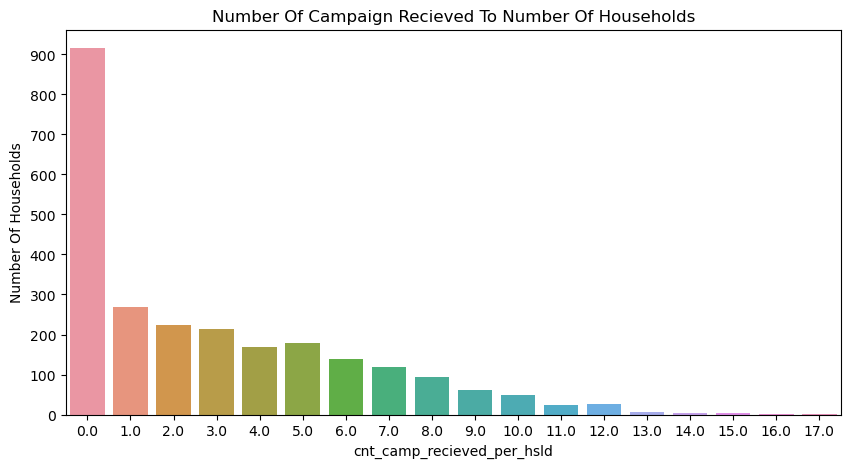

In [220]:
## INSIGHT
# Plotting Number of campaign recieved by number of households
plt.figure(figsize=(10,5))
sns.countplot(cnt_camp_recieved_per_hsld.cnt_camp_recieved_per_hsld)
plt.title('number of campaign recieved to number of households'.title())
plt.ylabel('number of households'.title())
plt.yticks(np.arange(0,1000,100))
plt.show()

In [221]:
distinct_camprdmptn_per_hsld

,household_key,distinct_camprdmptn_per_hsld
0,1,2
1,8,1
2,13,7
3,14,1
4,18,3
...,...,...
429,2488,5
430,2489,6
431,2494,1
432,2496,3


In [222]:
## INSIGHT
# Redemption_Rate of coupon campaign wise...  => MOST IMP (personally)
camp_rdmptn_rate=pd.merge(cnt_camp_recieved_per_hsld,distinct_camprdmptn_per_hsld,on='household_key',how='outer').fillna(0)
camp_rdmptn_rate['camp_rdmptn_rate']=camp_rdmptn_rate['distinct_camprdmptn_per_hsld']/camp_rdmptn_rate['cnt_camp_recieved_per_hsld']
#camp_rdmptn_rate.sort_values('camp_rdmptn_rate',ascending=False).head(20)
l.append('camp_rdmptn_rate')
camp_rdmptn_rate.sort_values(['camp_rdmptn_rate','cnt_camp_recieved_per_hsld'],ascending=False).head(30)

# demographic information of the households were the redemption rate was maximum can be studied.
# And the households with the similar pattern 

,household_key,cnt_camp_recieved_per_hsld,distinct_camprdmptn_per_hsld,camp_rdmptn_rate
366,367,9.0,9.0,1.000000
1590,1591,4.0,4.0,1.000000
425,426,3.0,3.0,1.000000
1317,1318,3.0,3.0,1.000000
1989,1990,3.0,3.0,1.000000
138,139,2.0,2.0,1.000000
1920,1921,2.0,2.0,1.000000
2374,2375,2.0,2.0,1.000000
78,79,1.0,1.0,1.000000
214,215,1.0,1.0,1.000000


In [223]:
camp_rdmptn_rate.sort_values(['cnt_camp_recieved_per_hsld','camp_rdmptn_rate'],ascending=False).head(10)

,household_key,cnt_camp_recieved_per_hsld,distinct_camprdmptn_per_hsld,camp_rdmptn_rate
2316,2317,17.0,3.0,0.176471
2488,2489,16.0,6.0,0.375000
717,718,15.0,5.0,0.333333
1526,1527,15.0,0.0,0.000000
2458,2459,15.0,0.0,0.000000
981,982,14.0,7.0,0.500000
1974,1975,14.0,4.0,0.285714
1916,1917,14.0,3.0,0.214286
675,676,14.0,0.0,0.000000
978,979,13.0,8.0,0.615385


In [224]:
camp_rdmptn_rate.fillna(0,inplace=True)

In [225]:
#x.append(camp_rdmptn_rate)
x.append(camp_rdmptn_rate.loc[:,['household_key','camp_rdmptn_rate']])

In [226]:
# Coupon redemption campaign wise..
cpnrdmpt_campwise=pd.merge(campaign_desc.loc[:,['DESCRIPTION','CAMPAIGN']],coupon_redempt.loc[:,['household_key','CAMPAIGN']],on='CAMPAIGN')
l.append('cpnrdmpt_campwise')

In [227]:
## INSIGHT
# Effeciancy campaign type wise..
cpnrdmpt_campwise.groupby('DESCRIPTION')['household_key'].count()

DESCRIPTION
TypeA    1791
TypeB     454
TypeC      73
Name: household_key, dtype: int64

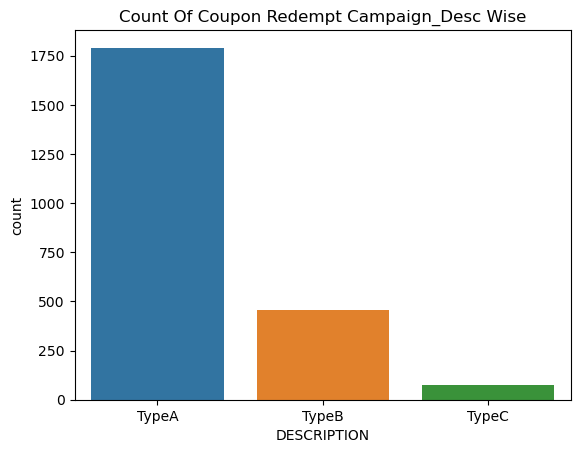

In [228]:
## INSIGHT
# Count of coupon redempt campaign_desc wise
sns.countplot(cpnrdmpt_campwise.DESCRIPTION.sort_values())
plt.title('Count of coupon redempt campaign_desc wise'.title())
plt.show()

* Promotional activity was best for TypeA campaigns
* and worst for TypeC

In [229]:
print('Best performing campaigns :',sorted(campaign_desc.loc[campaign_desc.DESCRIPTION=='TypeA','CAMPAIGN']))
print('Worst performing campaigns :',sorted(campaign_desc.loc[campaign_desc.DESCRIPTION=='TypeC','CAMPAIGN']))

Best performing campaigns : [8, 13, 18, 26, 30]
Worst performing campaigns : [3, 6, 14, 15, 20, 27]


## 4) Customers details => hh_demographic table

In [230]:
# basic cleaning of the demographic data => hh_demographic
hh_demographic['MARITAL_STATUS_CODE']=hh_demographic.MARITAL_STATUS_CODE.map({'A':'Married','B':'Single','U':'Unknown'})
hh_demographic['KID_CATEGORY_DESC']=np.where(hh_demographic.KID_CATEGORY_DESC=='None/Unknown',0,hh_demographic.KID_CATEGORY_DESC)
hh_demographic['KID_CATEGORY_DESC']=np.where(hh_demographic.KID_CATEGORY_DESC=='3+',3,hh_demographic.KID_CATEGORY_DESC)
hh_demographic['HOUSEHOLD_SIZE_DESC']=np.where(hh_demographic.HOUSEHOLD_SIZE_DESC=='5+',5,hh_demographic.HOUSEHOLD_SIZE_DESC)
hh_demographic

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Target
0,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,0,1,1
1,45-54,Married,50-74K,Homeowner,2 Adults No Kids,2,0,7,0
2,25-34,Unknown,25-34K,Unknown,2 Adults Kids,3,1,8,1
3,25-34,Unknown,75-99K,Homeowner,2 Adults Kids,4,2,13,1
4,45-54,Single,50-74K,Homeowner,Single Female,1,0,16,0
...,...,...,...,...,...,...,...,...,...
796,35-44,Unknown,50-74K,Homeowner,2 Adults No Kids,2,0,2494,1
797,45-54,Married,75-99K,Homeowner,Unknown,3,1,2496,1
798,45-54,Unknown,35-49K,Unknown,Single Male,1,0,2497,0
799,25-34,Unknown,50-74K,Homeowner,2 Adults No Kids,2,0,2498,0


* Out of 2500 households (from transaction data), demographic information of only 801 households are known.
* Out of 801 only 760 households were targeted by the campaigns.

 ## 5) Transactioin Data => transaction_data table
This table contains the transaction of past 2 years of 2500 households. But we need to clean the data as we are excluding last 3 campaigns.


To clean the dataset, we will follow the below steps :

* Load the data
* Keep sales before day 645
* Exclude transaction with sales value and quantity inferior or equal to 0 

In [231]:
transaction_data[transaction_data.SALES_VALUE==0].shape

(18850, 12)

In [232]:
transaction_data[transaction_data.QUANTITY==0].shape

(14466, 12)

In [233]:
# these trasnsactions is to be removed from the dataset
transaction_data=transaction_data.loc[(transaction_data.SALES_VALUE>0)&(transaction_data.QUANTITY>0),:]

In [234]:
# total sales per customer.
hsld_wise_ttlsales=transaction_data.groupby('household_key').agg(TOTAL_SALES_VALUE_hsld_wise=('SALES_VALUE','sum')).reset_index()
l.append('hsld_wise_ttlsales')
x.append(hsld_wise_ttlsales)
hsld_wise_ttlsales    # => obtained from transaction

,household_key,TOTAL_SALES_VALUE_hsld_wise
0,1,4330.16
1,2,1954.34
2,3,2653.21
3,4,1200.11
4,5,779.06
...,...,...
2495,2496,4339.66
2496,2497,7111.98
2497,2498,2601.60
2498,2499,3394.07


In [235]:
# No. of products purchased in a single visit.
No_of_items_in_single_trans=transaction_data.groupby(['household_key','BASKET_ID','DAY'])['QUANTITY'].sum().reset_index().rename(columns={'QUANTITY':'No_of_items_in_single_trans'})
l.append('No_of_items_in_single_trans')
No_of_items_in_single_trans

,household_key,BASKET_ID,DAY,No_of_items_in_single_trans
0,1,27601281299,51,34
1,1,27774192959,67,14
2,1,28024266849,88,13
3,1,28106322445,94,32
4,1,28235481967,101,20
...,...,...,...,...
275534,2500,42076591137,695,2
275535,2500,42115225458,698,12
275536,2500,42198526427,704,31
275537,2500,42229520973,706,6


In [236]:
# Mean items purchased per transaction by specific households.
mean_items_purch_per_trans=No_of_items_in_single_trans.loc[:,['household_key','No_of_items_in_single_trans']]
mean_items_purch_per_trans=mean_items_purch_per_trans.groupby('household_key')['No_of_items_in_single_trans'].mean().reset_index().rename(columns={'No_of_items_in_single_trans':'mean_items_purch_per_trans'})
#Avg_items_purch_per_trans.drop_duplicates(inplace=True)
mean_items_purch_per_trans=mean_items_purch_per_trans.round()
l.append('mean_items_purch_per_trans')
x.append(mean_items_purch_per_trans)
mean_items_purch_per_trans # => obtained from No_of_items_in_single_trans

,household_key,mean_items_purch_per_trans
0,1,23.0
1,2,19.0
2,3,182.0
3,4,13.0
4,5,6.0
...,...,...
2495,2496,2068.0
2496,2497,277.0
2497,2498,182.0
2498,2499,1594.0


In [237]:
# Total number of visits per customer
No_of_total_visits=pd.DataFrame(No_of_items_in_single_trans.groupby('household_key').size(),columns=['No_of_total_visits']).reset_index()
l.append('No_of_total_visits')
x.append(No_of_total_visits)
No_of_total_visits

,household_key,No_of_total_visits
0,1,85
1,2,45
2,3,47
3,4,30
4,5,40
...,...,...
2495,2496,63
2496,2497,221
2497,2498,172
2498,2499,90


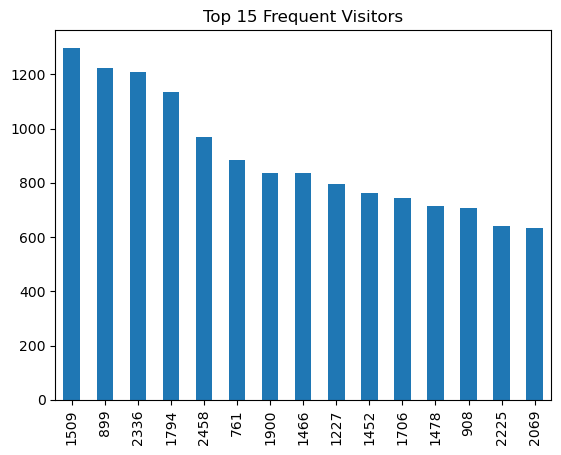

In [238]:
## INSIGHT
No_of_total_visits.sort_values('No_of_total_visits',ascending=False)[:15]['No_of_total_visits'].plot(kind='bar')
plt.title('Top 15 frequent visitors'.title())
plt.show()

In [239]:
# Amount spent by each customer in single transaction on the particular day. 
amt_spent_single_trans = pd.DataFrame(transaction_data.groupby(['household_key','BASKET_ID','DAY'])['SALES_VALUE'].sum()).reset_index()
l.append('amt_spent_single_trans')
amt_spent_single_trans

,household_key,BASKET_ID,DAY,SALES_VALUE
0,1,27601281299,51,78.66
1,1,27774192959,67,41.10
2,1,28024266849,88,26.90
3,1,28106322445,94,63.43
4,1,28235481967,101,53.45
...,...,...,...,...
275534,2500,42076591137,695,4.00
275535,2500,42115225458,698,50.54
275536,2500,42198526427,704,73.65
275537,2500,42229520973,706,13.95


In [240]:
# Mean amount spent by specific househlds per transaction wise.
mean_spent_single_trans_hsldwise=amt_spent_single_trans.loc[:,['household_key','SALES_VALUE']].groupby('household_key')['SALES_VALUE'].mean().reset_index().rename(columns={'SALES_VALUE':'MEAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS'})
mean_spent_single_trans_hsldwise=mean_spent_single_trans_hsldwise.round(2)
l.append('mean_spent_single_trans_hsldwise')
x.append(mean_spent_single_trans_hsldwise)
mean_spent_single_trans_hsldwise

,household_key,MEAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS
0,1,50.94
1,2,43.43
2,3,56.45
3,4,40.00
4,5,19.48
...,...,...
2495,2496,68.88
2496,2497,32.18
2497,2498,15.13
2498,2499,37.71


In [241]:
# Median amount spent by specific househlds per transaction wise => No impact of outliers..
median_spent_single_trans_hsldwise = pd.DataFrame(amt_spent_single_trans.groupby('household_key')['SALES_VALUE'].median()).reset_index().rename(columns={'SALES_VALUE':'MEDIAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS'})
l.append('median_spent_single_trans_hsldwise')
median_spent_single_trans_hsldwise=median_spent_single_trans_hsldwise.round(2)
x.append(median_spent_single_trans_hsldwise)
median_spent_single_trans_hsldwise

,household_key,MEDIAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS
0,1,49.33
1,2,26.94
2,3,36.38
3,4,27.04
4,5,16.48
...,...,...
2495,2496,73.52
2496,2497,18.12
2497,2498,8.98
2498,2499,15.96


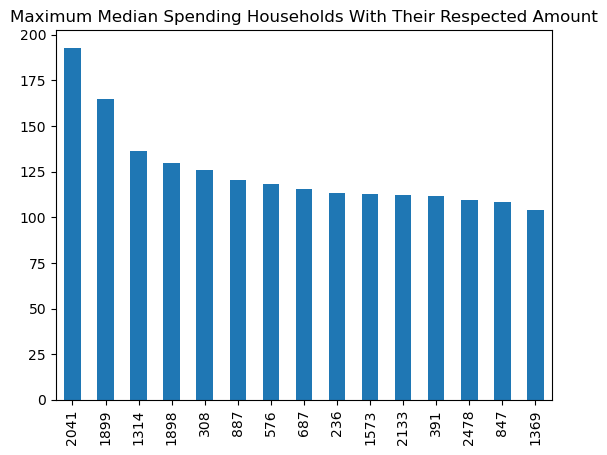

In [242]:
## INSIGHT
# Maximum spending households with the amount they spend.
median_spent_single_trans_hsldwise.sort_values('MEDIAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS',ascending=False)[:15]['MEDIAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS'].plot(kind='bar')
plt.title('Maximum median spending households with their respected amount'.title())
plt.show()

In [243]:
# mean product cost household wise 
avg_productcst_purchased_hsldwise=pd.DataFrame({'household_key':transaction_data.household_key,'Price_per_product_purchased':transaction_data.SALES_VALUE/transaction_data.QUANTITY}).groupby('household_key')['Price_per_product_purchased'].mean().reset_index()
l.append('avg_productcst_purchased_hsldwise')
avg_productcst_purchased_hsldwise=avg_productcst_purchased_hsldwise.round(2)
x.append(avg_productcst_purchased_hsldwise)
avg_productcst_purchased_hsldwise

,household_key,Price_per_product_purchased
0,1,2.31
1,2,2.53
2,3,1.98
3,4,3.40
4,5,3.34
...,...,...
2495,2496,2.24
2496,2497,2.83
2497,2498,2.75
2498,2499,2.32


In [244]:
l

['cnt_camp_recieved_per_hsld',
 'distinct_camprdmptn_per_hsld',
 'cnt_of_camp_recieved_by_num_of_hsld',
 'camp_rdmptn_rate',
 'cpnrdmpt_campwise',
 'hsld_wise_ttlsales',
 'No_of_items_in_single_trans',
 'mean_items_purch_per_trans',
 'No_of_total_visits',
 'amt_spent_single_trans',
 'mean_spent_single_trans_hsldwise',
 'median_spent_single_trans_hsldwise',
 'avg_productcst_purchased_hsldwise']

In [297]:
a=['count of campaign recieved per household',
   'coupons of distinct campaign redempt by specific household',
  'number of campaign recieved by number of households',
   'rate of redemption of each household',
   'Coupon redemption campaign wise',
   'total purchase done by each household during tha span of 2 years',
  'total number of transactions and number of product purchased per transaction',
   'average number of products purchased per transaction wise',
   'total number of visits of each households',
  'amount spent in a single transaction',
   'mean spent of each household in single transaction',
   'median spent of each household in single transaction',
  'average cost of products purchased by specific household']
Extracted_tables_info=pd.DataFrame({'Tables Extracted':l,'Information Derived':a})
Extracted_tables_info

,Tables Extracted,Information Derived
0,cnt_camp_recieved_per_hsld,count of campaign recieved per household
1,distinct_camprdmptn_per_hsld,coupons of distinct campaign redempt by specif...
2,cnt_of_camp_recieved_by_num_of_hsld,number of campaign recieved by number of house...
3,camp_rdmptn_rate,rate of redemption of each household
4,cpnrdmpt_campwise,Coupon redemption campaign wise
5,hsld_wise_ttlsales,total purchase done by each household during t...
6,No_of_items_in_single_trans,total number of transactions and number of pro...
7,mean_items_purch_per_trans,average number of products purchased per trans...
8,No_of_total_visits,total number of visits of each households
9,amt_spent_single_trans,amount spent in a single transaction


In [246]:
# Merging of all the features obtained during feature engineering to the obtain the main file for modeling.
d=hh_demographic.copy()
for i in x:
    d=pd.merge(d,i,on='household_key',how='left')
d.set_index('household_key',inplace=True)
d

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Target,cnt_camp_recieved_per_hsld,distinct_camprdmptn_per_hsld,camp_rdmptn_rate,TOTAL_SALES_VALUE_hsld_wise,mean_items_purch_per_trans,No_of_total_visits,MEAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS,MEDIAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS,Price_per_product_purchased
household_key,,,,,,,,,,,,,,,,,
1,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,0,1,8.0,2.0,0.25,4330.16,23.0,85,50.94,49.33,2.31
7,45-54,Married,50-74K,Homeowner,2 Adults No Kids,2,0,0,4.0,NaN,0.00,3400.05,26.0,59,57.63,47.97,2.40
8,25-34,Unknown,25-34K,Unknown,2 Adults Kids,3,1,1,10.0,1.0,0.10,5534.97,605.0,113,48.98,35.80,2.40
13,25-34,Unknown,75-99K,Homeowner,2 Adults Kids,4,2,1,10.0,7.0,0.70,13190.92,6778.0,275,47.97,40.96,2.93
16,45-54,Single,50-74K,Homeowner,Single Female,1,0,0,2.0,NaN,0.00,1512.02,829.0,98,15.43,12.68,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,35-44,Unknown,50-74K,Homeowner,2 Adults No Kids,2,0,1,2.0,1.0,0.50,2120.93,1653.0,35,60.60,50.57,2.73
2496,45-54,Married,75-99K,Homeowner,Unknown,3,1,1,5.0,3.0,0.60,4339.66,2068.0,63,68.88,73.52,2.24
2497,45-54,Unknown,35-49K,Unknown,Single Male,1,0,0,3.0,NaN,0.00,7111.98,277.0,221,32.18,18.12,2.83


In [247]:
d.isnull().sum()
# distinct_camprdmptn_per_hsld => nan values represent those households which redempt 0 coupons from distant campaign.

AGE_DESC                                         0
MARITAL_STATUS_CODE                              0
INCOME_DESC                                      0
HOMEOWNER_DESC                                   0
HH_COMP_DESC                                     0
HOUSEHOLD_SIZE_DESC                              0
KID_CATEGORY_DESC                                0
Target                                           0
cnt_camp_recieved_per_hsld                       0
distinct_camprdmptn_per_hsld                   490
camp_rdmptn_rate                                 0
TOTAL_SALES_VALUE_hsld_wise                      0
mean_items_purch_per_trans                       0
No_of_total_visits                               0
MEAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS        0
MEDIAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS      0
Price_per_product_purchased                      0
dtype: int64

In [248]:
d.fillna(0,inplace=True)

In [249]:
# Triming will be done as the data contains those households who didnt recieved coupons from any of a campaign.
d=d[d.cnt_camp_recieved_per_hsld!=0]

In [250]:
d.shape

(760, 17)

In [251]:
d.to_csv('hh_demo_final.csv')

In [252]:
cd

C:\Users\91997


In [253]:
d.drop(columns='distinct_camprdmptn_per_hsld',inplace=True) 
d.drop(columns='camp_rdmptn_rate',inplace=True)
# As these columns has direct relation with the target variable.

# Statistical test for Features created.

In [254]:
fe=[]
for i in d.columns:
    if i not in hh_demographic.columns:
        fe.append(i)
fe_df=pd.DataFrame()
j=1
for i in fe:
    zero=d.loc[d.Target==0,i]
    ones=d.loc[d.Target==1,i]
    # Ho: data is normal => pvalue>0.05
    # Ha: data not normal
    p1=stats.shapiro(zero)[1]
    p2=stats.shapiro(ones)[1]
    # Ho: variance equal => pvalue>0.05
    # Ha: variance not equal
    p3=stats.levene(zero,ones)[1]
    if ((p1>0.05) & (p2>0.05) & (p3>0.05)):
        fe_df.loc[j,'Feature_Created']=i
        fe_df.loc[j,'Name_of_test']='ttest_ind'
        # Ho: independent (no effect)
        # Ha: dependent (has an effect)
        fe_df.loc[j,'P-value']=stats.stats.ttest_ind(zero,ones)[1]
    else:
        fe_df.loc[j,'Feature_Created']=i
        fe_df.loc[j,'Name_of_test']='mannwhitneyu'
        # Ho: independent (no effect)
        # Ha: dependent (has an effect)
        fe_df.loc[j,'P-value']=stats.mannwhitneyu(zero,ones)[1]
    j+=1
fe_df.sort_values('P-value')

,Feature_Created,Name_of_test,P-value
2,TOTAL_SALES_VALUE_hsld_wise,mannwhitneyu,3.962274e-24
1,cnt_camp_recieved_per_hsld,mannwhitneyu,1.707995e-16
3,mean_items_purch_per_trans,mannwhitneyu,4.960288e-11
5,MEAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS,mannwhitneyu,2.757086e-09
6,MEDIAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS,mannwhitneyu,1.326139e-08
4,No_of_total_visits,mannwhitneyu,2.666980e-07
7,Price_per_product_purchased,mannwhitneyu,9.128221e-02


# Univariate Analysis.

In [255]:
numcol=d.select_dtypes(np.number).columns
catcol=d.select_dtypes('object').columns

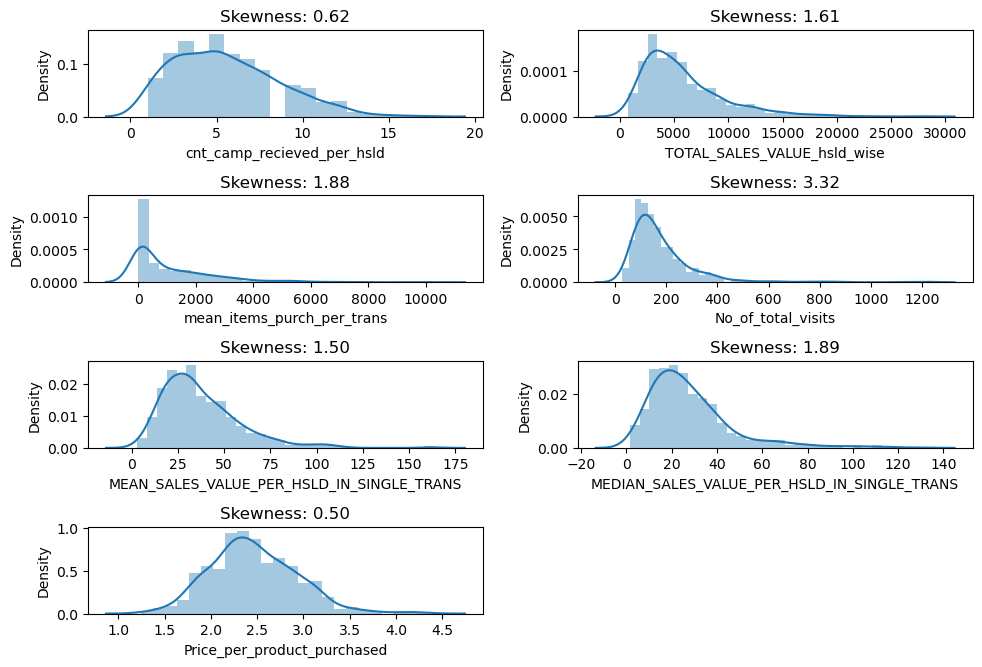

In [256]:
plt.figure(figsize=(10,8))
ii=1
for i in numcol[1:]:
    plt.subplot(len(numcol)//2+1,2,ii)
    sns.distplot(d[i])
    plt.title('Skewness: %0.2f'%(d[i].skew()))
    ii+=1
plt.tight_layout()    
plt.show()

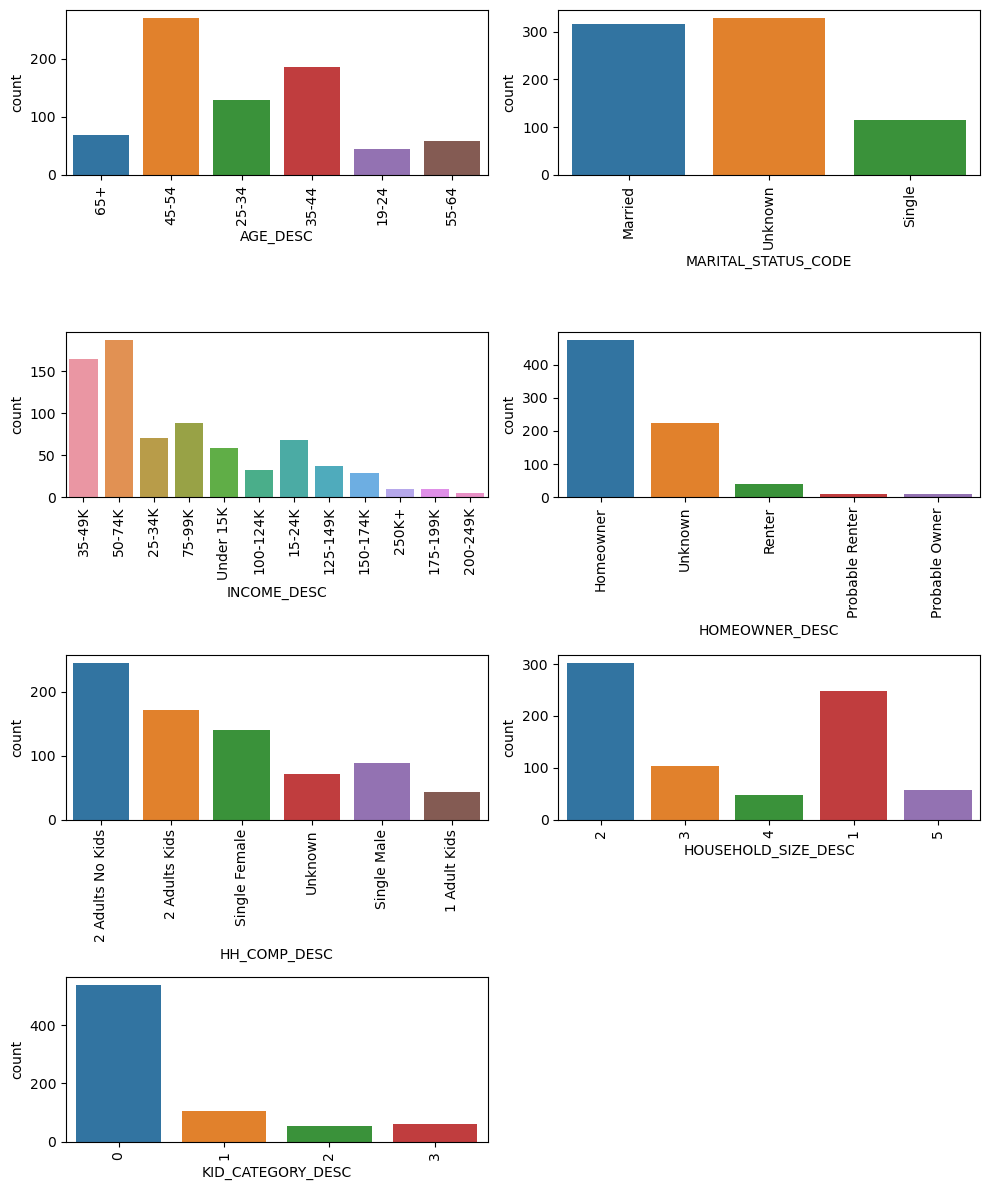

In [257]:
plt.figure(figsize=(10,12))
ii=1
for i in catcol:
    plt.subplot(len(catcol)//2+1,2,ii)
    sns.countplot(d[i])
    plt.xticks(rotation=90)
    ii+=1
plt.tight_layout()
plt.show()

# Bivariate Analysis

In [258]:
catcol

Index(['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC'],
      dtype='object')

In [259]:
d

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Target,cnt_camp_recieved_per_hsld,TOTAL_SALES_VALUE_hsld_wise,mean_items_purch_per_trans,No_of_total_visits,MEAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS,MEDIAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS,Price_per_product_purchased
household_key,,,,,,,,,,,,,,,
1,65+,Married,35-49K,Homeowner,2 Adults No Kids,2,0,1,8.0,4330.16,23.0,85,50.94,49.33,2.31
7,45-54,Married,50-74K,Homeowner,2 Adults No Kids,2,0,0,4.0,3400.05,26.0,59,57.63,47.97,2.40
8,25-34,Unknown,25-34K,Unknown,2 Adults Kids,3,1,1,10.0,5534.97,605.0,113,48.98,35.80,2.40
13,25-34,Unknown,75-99K,Homeowner,2 Adults Kids,4,2,1,10.0,13190.92,6778.0,275,47.97,40.96,2.93
16,45-54,Single,50-74K,Homeowner,Single Female,1,0,0,2.0,1512.02,829.0,98,15.43,12.68,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,35-44,Unknown,50-74K,Homeowner,2 Adults No Kids,2,0,1,2.0,2120.93,1653.0,35,60.60,50.57,2.73
2496,45-54,Married,75-99K,Homeowner,Unknown,3,1,1,5.0,4339.66,2068.0,63,68.88,73.52,2.24
2497,45-54,Unknown,35-49K,Unknown,Single Male,1,0,0,3.0,7111.98,277.0,221,32.18,18.12,2.83


<Figure size 1000x1200 with 0 Axes>

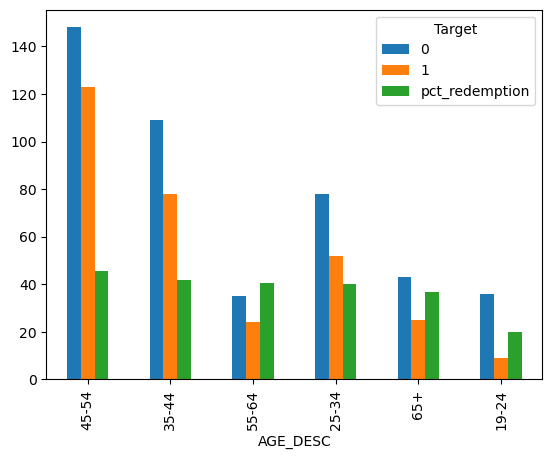

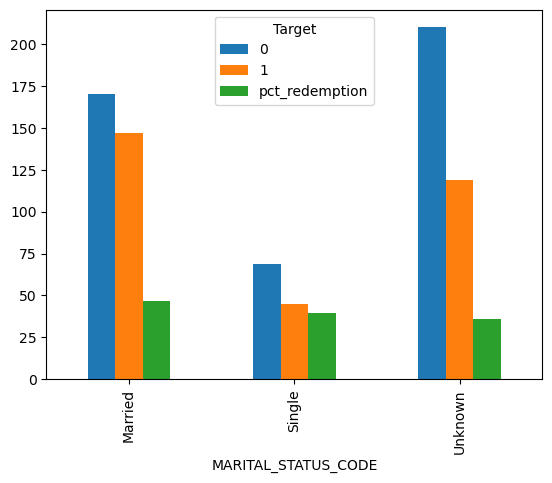

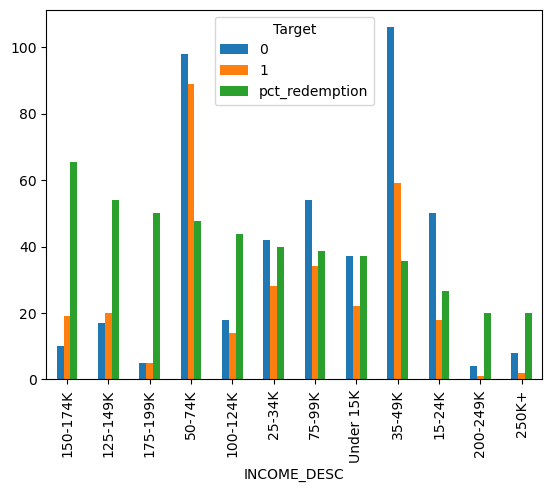

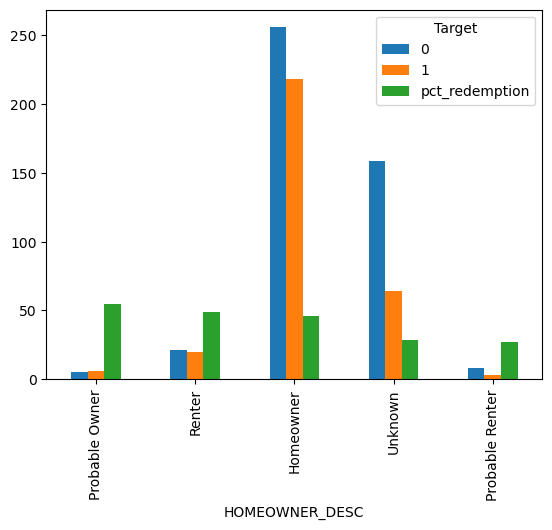

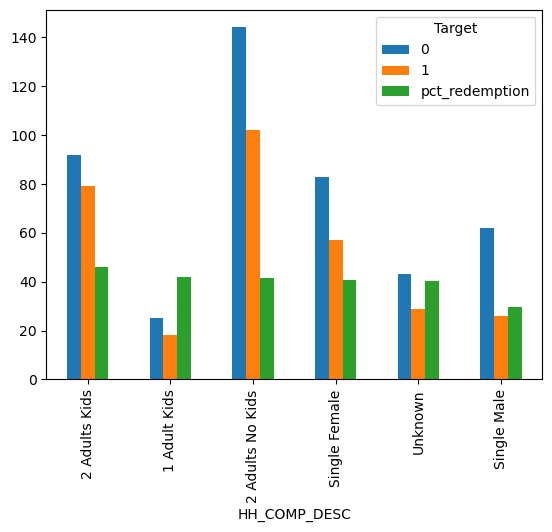

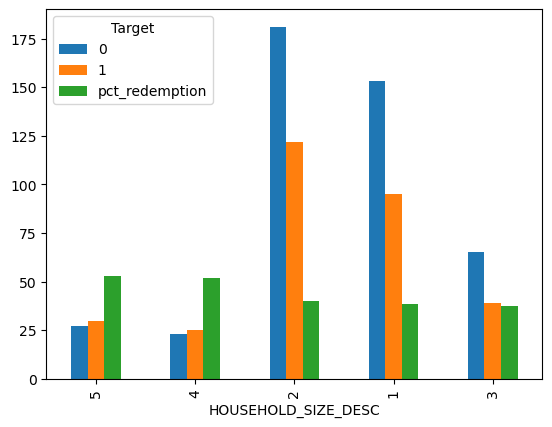

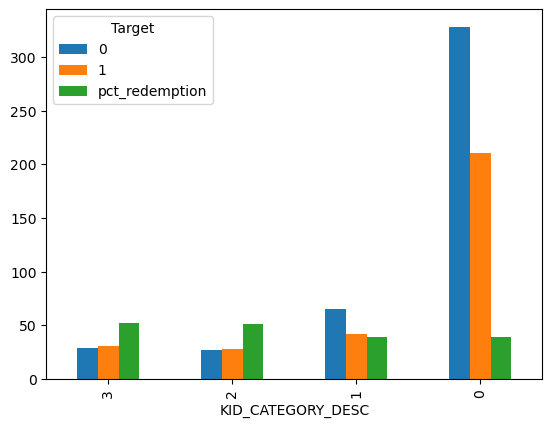

In [260]:
plt.figure(figsize=(10,12))
ii=1
for i in catcol:
    a=pd.crosstab(d[i],d.Target)
    a['pct_redemption']=a[1]/(a[0]+a[1])*100
    a.sort_values('pct_redemption',ascending=False).plot(kind='bar')
    plt.show()

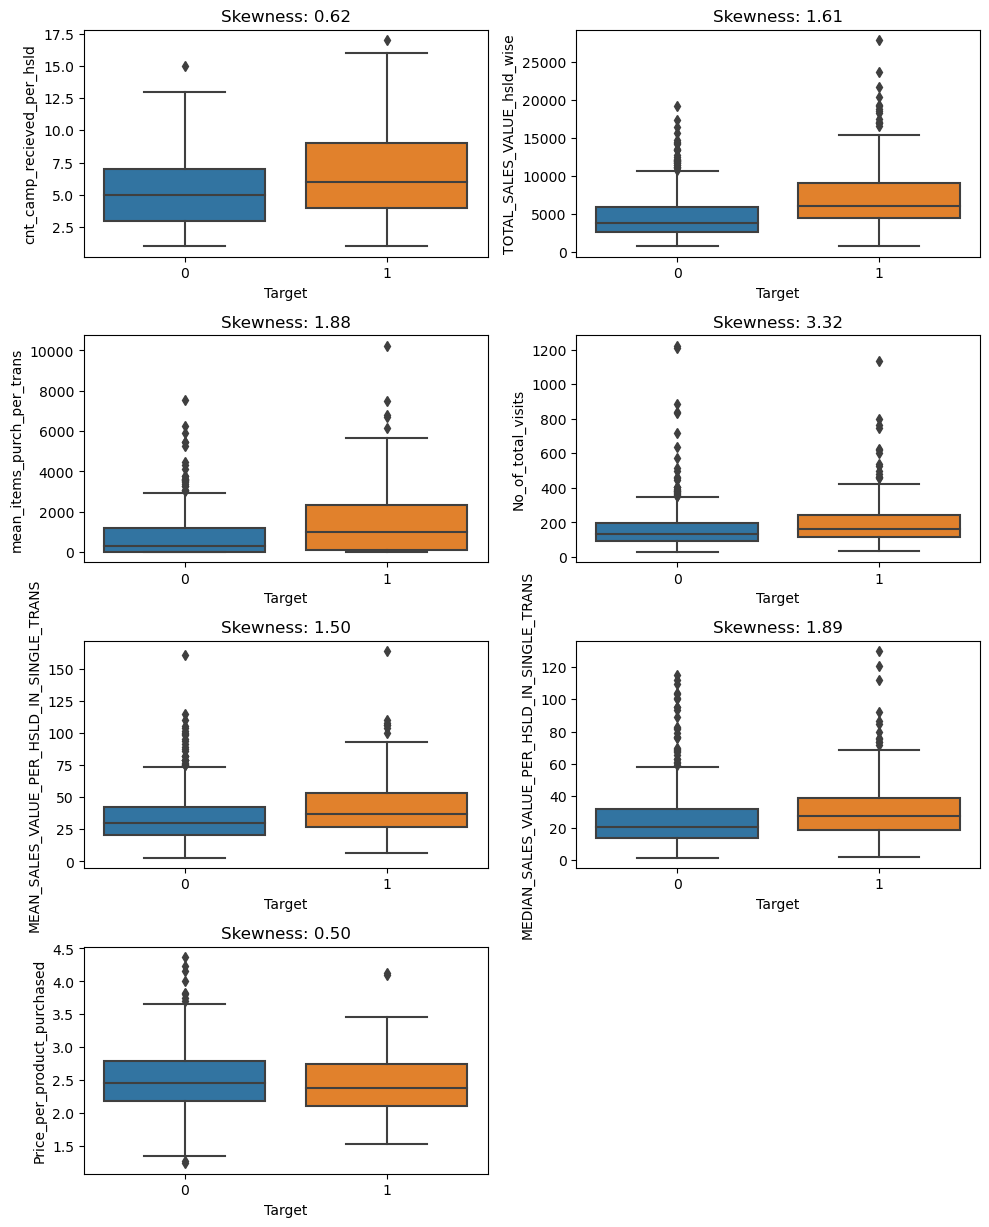

In [261]:
plt.figure(figsize=(10,15))
ii=1
for i in numcol[1:]:
    plt.subplot(len(numcol)//2+1,2,ii)
    sns.boxplot(d['Target'],d[i])
    plt.title('Skewness: %0.2f'%(d[i].skew()))
    ii=ii+1
plt.tight_layout()
plt.show()

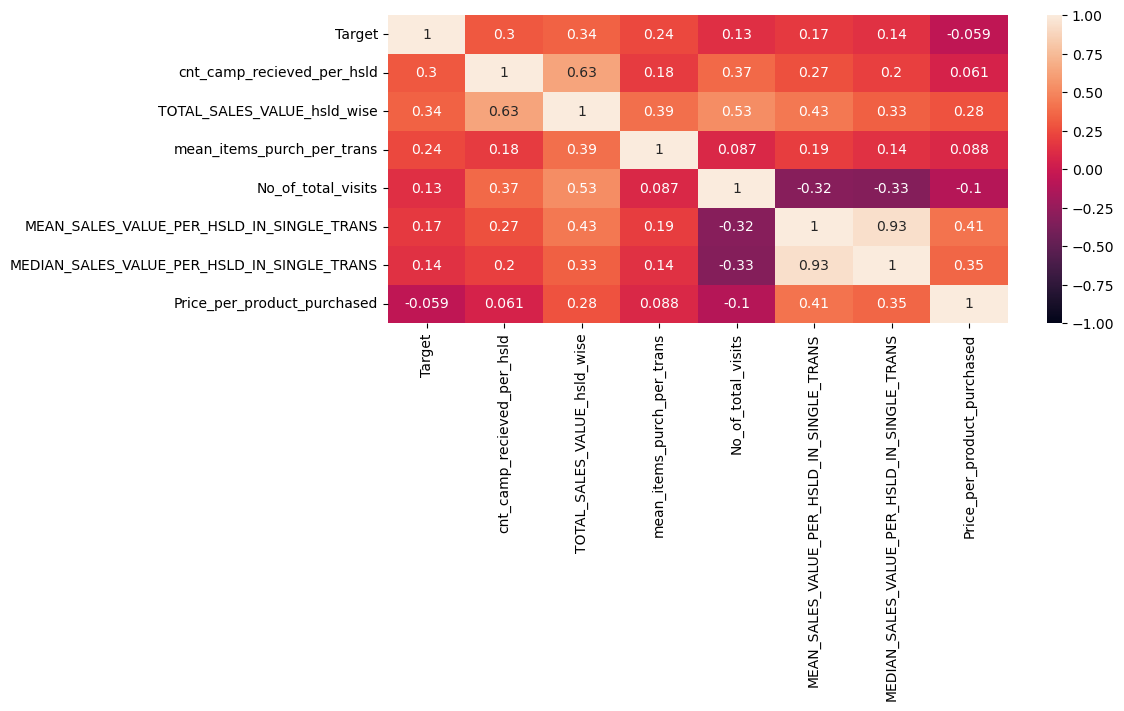

In [262]:
# correlation plot before encoding and scalling..
plt.figure(figsize=(10,4))
sns.heatmap(d.corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

# Outliers Treatement

In [263]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Target,760.0,0.409211,0.492012,0.00,0.000,0.000,1.0000,1.00
cnt_camp_recieved_per_hsld,760.0,5.543421,3.039608,1.00,3.000,5.000,7.2500,17.00
TOTAL_SALES_VALUE_hsld_wise,760.0,5775.177724,3754.633354,760.45,3080.465,4838.825,7278.3000,27859.68
mean_items_purch_per_trans,760.0,1100.185526,1413.987268,3.00,34.750,475.500,1708.2500,10234.00
No_of_total_visits,760.0,179.032895,131.441146,28.00,101.000,144.500,216.0000,1223.00
MEAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS,760.0,37.190316,21.026119,2.84,22.080,32.545,47.2700,163.43
MEDIAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS,760.0,27.975092,18.999671,1.52,15.150,23.690,34.9425,129.83
Price_per_product_purchased,760.0,2.462039,0.470321,1.24,2.160,2.420,2.7700,4.37


In [264]:
# caping of outiers is done.
q1=d.quantile(0.25)
q3=d.quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
ll=ll[1:]
ul=ul[1:]
for i in ll.index:
    for j in d.index:
        if d.loc[j,i]<ll[i]:
            d.loc[j,i]=ll[i]
        if d.loc[j,i]>ul[i]:
            d.loc[j,i]=ul[i]

In [265]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Target,760.0,0.409211,0.492012,0.000,0.000,0.000,1.0000,1.00000
cnt_camp_recieved_per_hsld,760.0,5.530757,3.001019,1.000,3.000,5.000,7.2500,13.62500
TOTAL_SALES_VALUE_hsld_wise,760.0,5623.909217,3285.386668,760.450,3080.465,4838.825,7278.3000,13575.05250
mean_items_purch_per_trans,760.0,1044.481579,1231.175780,3.000,34.750,475.500,1708.2500,4218.50000
No_of_total_visits,760.0,168.929605,91.351036,28.000,101.000,144.500,216.0000,388.50000
MEAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS,760.0,36.560875,18.913709,2.840,22.080,32.545,47.2700,85.05500
MEDIAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS,760.0,26.864638,15.476639,1.520,15.150,23.690,34.9425,64.63125
Price_per_product_purchased,760.0,2.457770,0.456839,1.245,2.160,2.420,2.7700,3.68500


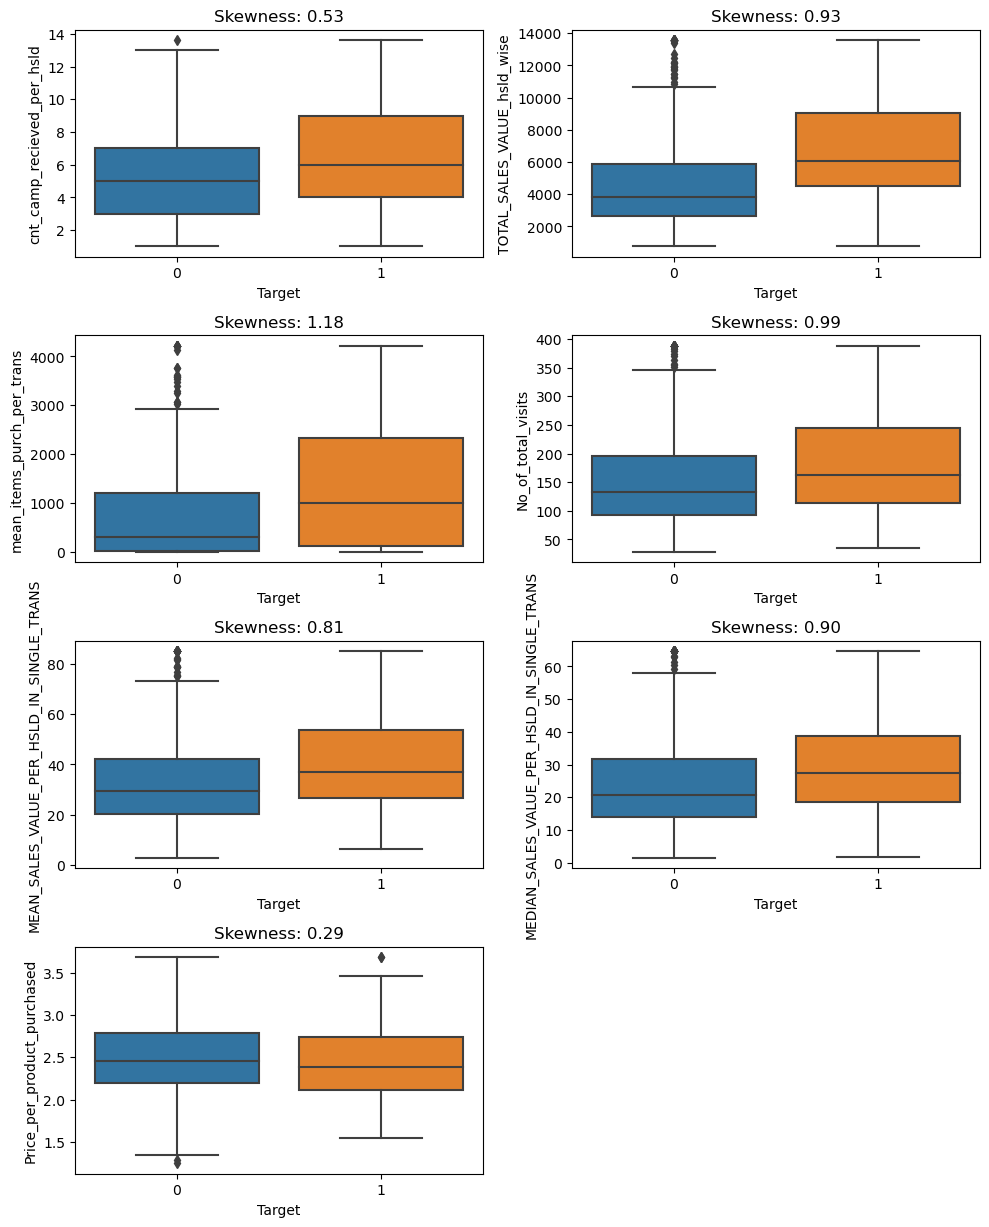

In [266]:
plt.figure(figsize=(10,15))
ii=1
for i in numcol[1:]:
    plt.subplot(len(numcol)//2+1,2,ii)
    sns.boxplot(d['Target'],d[i])
    plt.title('Skewness: %0.2f'%(d[i].skew()))
    ii=ii+1
plt.tight_layout()
plt.show()

In [267]:
df1=d.copy()
X=df1.drop(columns='Target')
y=df1.Target

# Splitting into train and test

In [277]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,stratify=y)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((608, 14), (608,), (152, 14), (152,))

# Scalling

In [278]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in df1.select_dtypes(np.number).columns[1:]:
    xtrain[i]=sc.fit_transform(xtrain[[i]])
    xtest[i]=sc.transform(xtest[[i]])

# Encoding

In [279]:
for i in ['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC']:
    xtrain[i]=pd.factorize(xtrain[i])[0]
    xtest[i]=pd.factorize(xtest[i])[0]
for i in df1.select_dtypes('object'):
    xtrain[i]=xtrain[i].astype(np.number)
    xtest[i]=xtest[i].astype(np.number)

In [280]:
X=pd.concat((xtrain,xtest))
y=pd.concat((ytrain,ytest))

In [281]:
# checking for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [282]:
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index = X.columns).sort_values(ascending=False)

HOUSEHOLD_SIZE_DESC                            13.440818
MEAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS      13.166235
TOTAL_SALES_VALUE_hsld_wise                     8.562018
MEDIAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS     8.036833
No_of_total_visits                              6.502320
KID_CATEGORY_DESC                               4.888606
HH_COMP_DESC                                    4.004338
MARITAL_STATUS_CODE                             2.985988
INCOME_DESC                                     2.471147
AGE_DESC                                        2.290008
cnt_camp_recieved_per_hsld                      1.928667
HOMEOWNER_DESC                                  1.719268
Price_per_product_purchased                     1.339093
mean_items_purch_per_trans                      1.248887
dtype: float64

In [283]:
X.drop(columns='HOUSEHOLD_SIZE_DESC',inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index = X.columns).sort_values(ascending=False)

MEAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS      13.130666
TOTAL_SALES_VALUE_hsld_wise                     8.553469
MEDIAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS     8.022758
No_of_total_visits                              6.486399
HH_COMP_DESC                                    3.685749
MARITAL_STATUS_CODE                             2.182476
INCOME_DESC                                     2.159016
KID_CATEGORY_DESC                               2.143647
AGE_DESC                                        2.027295
cnt_camp_recieved_per_hsld                      1.926687
HOMEOWNER_DESC                                  1.630728
Price_per_product_purchased                     1.337916
mean_items_purch_per_trans                      1.247477
dtype: float64

In [284]:
X.drop(columns='MEAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS',inplace=True)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])], index = X.columns).sort_values(ascending=False)

TOTAL_SALES_VALUE_hsld_wise                    5.876390
No_of_total_visits                             4.441690
HH_COMP_DESC                                   3.681113
MEDIAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS    3.210666
MARITAL_STATUS_CODE                            2.178721
INCOME_DESC                                    2.158961
KID_CATEGORY_DESC                              2.134264
AGE_DESC                                       2.027159
cnt_camp_recieved_per_hsld                     1.916484
HOMEOWNER_DESC                                 1.622440
Price_per_product_purchased                    1.328838
mean_items_purch_per_trans                     1.243462
dtype: float64

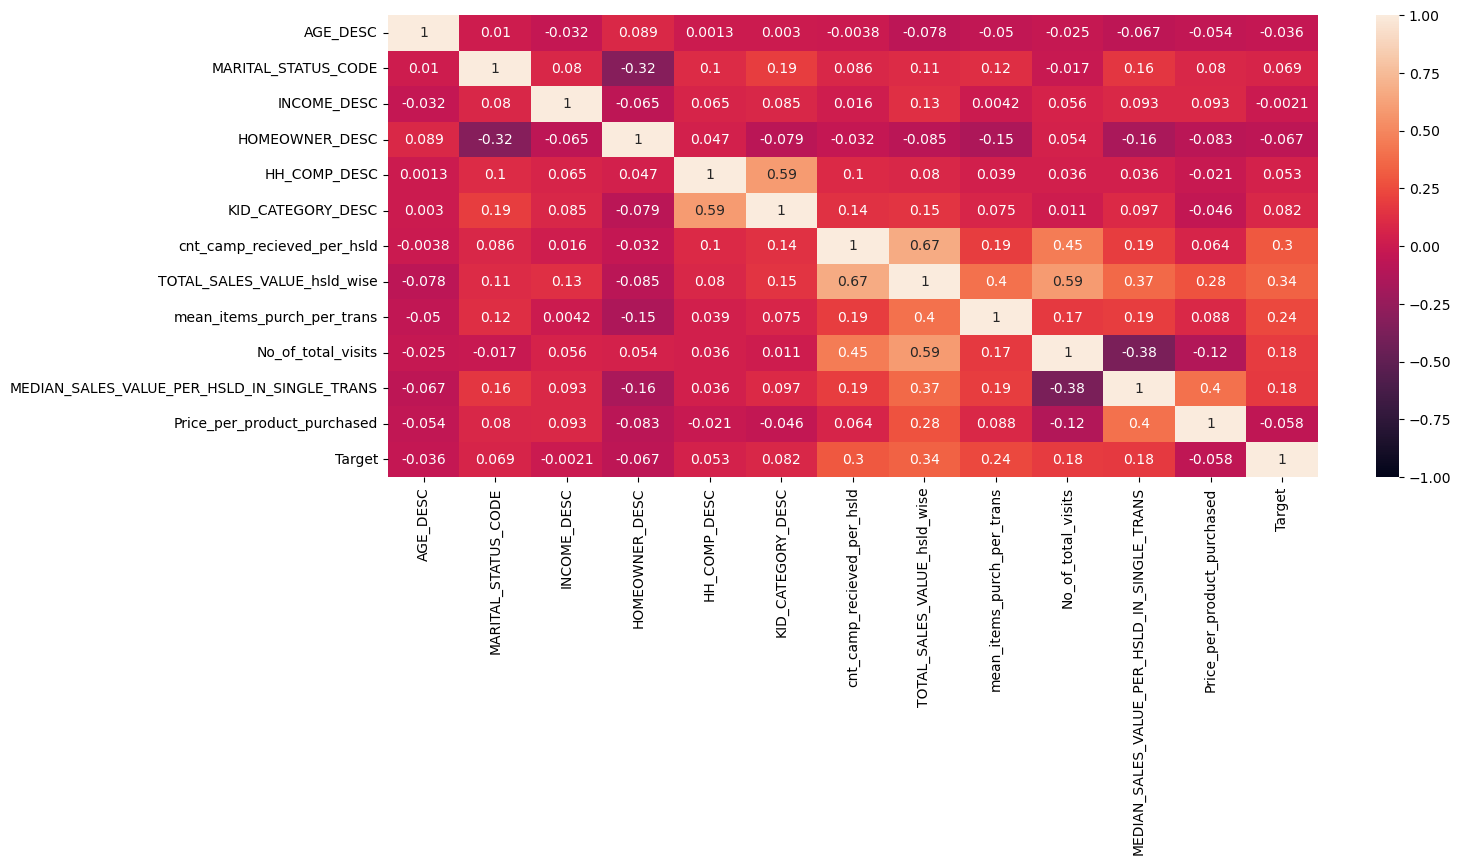

In [285]:
# correlation plot after encoding and scalling.
plt.figure(figsize=(15,6))
sns.heatmap(pd.concat((X,y),axis=1).corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

#  Modeling

In [286]:
from statsmodels.api import Logit, add_constant

In [289]:
from statsmodels.api import Logit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, classification_report

lr=LogisticRegression()
knn=KNeighborsClassifier()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()
gbm=GradientBoostingClassifier()
xgb=XGBClassifier()
cat=CatBoostClassifier()
lgbm=LGBMClassifier()
mdls=[dt,nb,knn,rfc,ada,gbm,xgb,lgbm]

In [290]:
#m=Logit(ytrain,add_constant(xtrain)).fit()
#m.summary()
mdls

[DecisionTreeClassifier(),
 GaussianNB(),
 KNeighborsClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 LGBMClassifier()]

In [291]:
l1=['dt','nb','knn','rfc','ada','gbm','xgb','lgbm']

In [292]:
logit=Logit(ytrain,xtrain).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.573091
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                  608
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                           13
Date:                Wed, 14 Jun 2023   Pseudo R-squ.:                  0.1531
Time:                        01:18:15   Log-Likelihood:                -348.44
converged:                       True   LL-Null:                       -411.43
Covariance Type:            nonrobust   LLR p-value:                 1.319e-20
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
AGE_DESC                                       -0.0263      0.059     -0.448      0.655      -0.141       0.089
MARITAL_STATUS_CODE                             0.1548      0.128      1.211      0.226      -0.096       0.405
INCOME_DESC                                    -0.0300      0.028     -1.059      0.290      -0.086       0.026
HOMEOWNER_DESC                                 -0.0652      0.073     -0.890      0.374      -0.209       0.078
HH_COMP_DESC                                    0.0278      0.067      0.417      0.677      -0.103       0.158
HOUSEHOLD_SIZE_DESC                            -0.2362      0.144     -1.641      0.101      -0.518       0.046
KID_CATEGORY_DESC                               0.1983      0.189      1.050      0.294      -0.172       0.568
cnt_camp_recieved_per_hsld                      0.2746      0.131      2.103      0.035       0.019       0.531
TOTAL_SALES_VALUE_hsld_wise                     0.6220      0.272      2.288      0.022       0.089       1.155
mean_items_purch_per_trans                      0.2274      0.101      2.244      0.025       0.029       0.426
No_of_total_visits                              0.0352      0.230      0.153      0.878      -0.416       0.486
MEAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS      -0.1900      0.335     -0.567      0.571      -0.847       0.467
MEDIAN_SALES_VALUE_PER_HSLD_IN_SINGLE_TRANS     0.4369      0.260      1.683      0.092      -0.072       0.946
Price_per_product_purchased                    -0.4040      0.113     -3.585      0.000      -0.625      -0.183
===============================================================================================================
"""

In [293]:
dic1=pd.DataFrame()
j=0;
for i in mdls[:-1]:
    m=i.fit(xtrain,ytrain)
    pred=m.predict(xtest)
    print(i,':')
    print(confusion_matrix(ytest,pred))
    dic1.loc[j,'Model']=l1[j]
    dic1.loc[j,'accuracy_score']=accuracy_score(ytest,pred)
    dic1.loc[j,'f1_score']=f1_score(ytest,pred)
    dic1.loc[j,'recall_score']=recall_score(ytest,pred)
    dic1.loc[j,'precision_score']=precision_score(ytest,pred)
    j+=1
    print()

DecisionTreeClassifier() :
[[62 28]
 [32 30]]

GaussianNB() :
[[68 22]
 [37 25]]

KNeighborsClassifier() :
[[70 20]
 [42 20]]

RandomForestClassifier() :
[[67 23]
 [34 28]]

AdaBoostClassifier() :
[[67 23]
 [33 29]]

GradientBoostingClassifier() :
[[70 20]
 [30 32]]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, rand

In [294]:
dic1.sort_values('f1_score',ascending=False)

,Model,accuracy_score,f1_score,recall_score,precision_score
5,gbm,0.671053,0.561404,0.516129,0.615385
6,xgb,0.631579,0.525424,0.500000,0.553571
4,ada,0.631579,0.508772,0.467742,0.557692
0,dt,0.605263,0.500000,0.483871,0.517241
3,rfc,0.625000,0.495575,0.451613,0.549020
1,nb,0.611842,0.458716,0.403226,0.531915
2,knn,0.592105,0.392157,0.322581,0.500000


In [85]:
gbm=GradientBoostingClassifier() #  n_estimators, learning_rate, max_depth
from sklearn.model_selection import GridSearchCV

In [295]:
params={'max_depth':[3,5,7], 'n_estimators':[100,200,300,500],'learning_rate':[0.05,0.1,0.15]}
grid=GridSearchCV(estimator=gbm,param_grid=params,scoring='f1',cv=3)
grid.fit(X,y)
gbm=GradientBoostingClassifier(**grid.best_params_)
m=rfc.fit(xtrain,ytrain)
pred=m.predict(xtest)
print('confusion_matrix:\n',confusion_matrix(ytest,pred))
print()
print('accuracy_score:',accuracy_score(ytest,pred))
print()
print('f1_score:',f1_score(ytest,pred))
print()
print('precision_score:',precision_score(ytest,pred))
print()
print('recall_score:',recall_score(ytest,pred))
print()
print('classification_report:\n',classification_report(ytest,pred))

confusion_matrix:
 [[65 25]
 [33 29]]

accuracy_score: 0.618421052631579

f1_score: 0.5

precision_score: 0.5370370370370371

recall_score: 0.46774193548387094

classification_report:
               precision    recall  f1-score   support

           0       0.66      0.72      0.69        90
           1       0.54      0.47      0.50        62

    accuracy                           0.62       152
   macro avg       0.60      0.59      0.60       152
weighted avg       0.61      0.62      0.61       152



In [87]:
# tuning backfired.